# Gaussian Mixture Models (GMM) Clustering

## Assignment C
**Goal:** Implement GMM clustering (not from scratch) and visualize the results.

**Dataset:** [Breast Cancer Wisconsin (Diagnostic)](https://paperswithcode.com/dataset/breast-cancer-wisconsin) (loaded via `sklearn.datasets`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Set random seed
np.random.seed(17)

## 1. Load and Prepare Data
We use the Breast Cancer dataset, which is a binary classification problem (Malignant vs Benign). We'll see if GMM can recover these clusters unsupervised.

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data shape: {X_scaled.shape}")

Data shape: (569, 30)


## 2. Train GMM
We fit a GMM with `n_components=2`.

In [3]:
gmm = GaussianMixture(n_components=2, random_state=17)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Evaluation Metrics
print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, labels):.4f}")

Silhouette Score: 0.3145
Davies-Bouldin Score: 1.3770


## 3. Visual Analysis
Using PCA to visualize the clusters and the probability density.

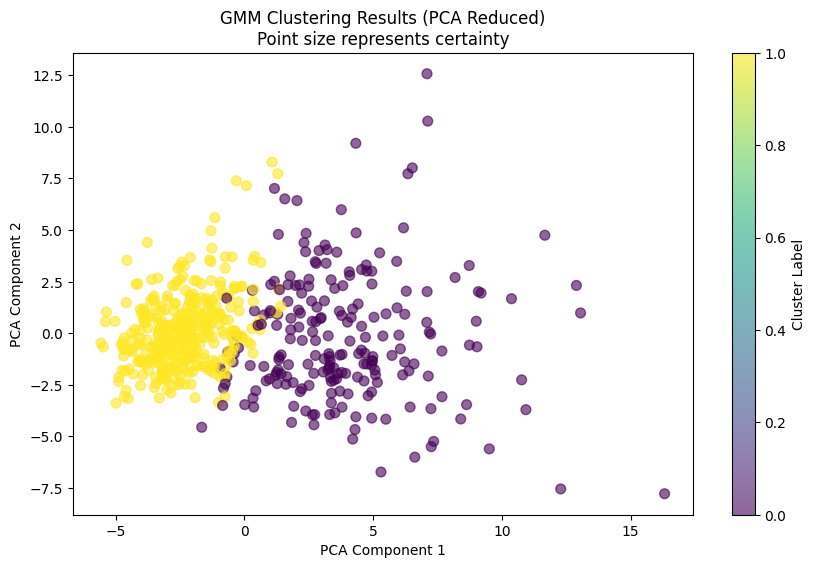

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get probabilities for soft clustering visualization
probs = gmm.predict_proba(X_scaled)

plt.figure(figsize=(10, 6))
# Size of points proportional to the probability of the predicted class (certainty)
size = 50 * probs.max(1) ** 2
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=size, alpha=0.6)
plt.title('GMM Clustering Results (PCA Reduced)\nPoint size represents certainty')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()